<a href="https://colab.research.google.com/github/GabrielaSchubert/Python_no_Google_Colaboratory/blob/main/Aula_04_Estatistica_Descritiva_02_Com_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importa bibliotecas**

In [ ]:
import numpy as np
import statistics
from scipy import stats
import math

## **Carrega o Conjunto de Dados (dataset)**


In [ ]:
dados = np.array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
                  157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
                  163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
                  173])

# **Medidas de Tendência Central**
Valor de um conjunto de dados (dataset) que representa uma entrada típica ou central

## **Média Aritmética Simples**

In [ ]:
#calculando média manualmente
dados.sum() / len(dados)

np.float64(160.375)

In [ ]:
#calculando a média usando função do NumPy
dados.mean()

np.float64(160.375)

In [ ]:
#calculando a média usando pacote "statistics" do Python
statistics.mean(dados)

np.int64(160)

## **Moda**

In [ ]:
#calculando a moda usando pacote "statistics" do Python
statistics.mode(dados)

np.int64(160)

In [ ]:
#calculando a moda usando pacote "stats" do ScyPy
stats.mode(dados)

ModeResult(mode=np.int64(160), count=np.int64(5))

## **Mediana**

In [ ]:
#número de elementos no dataset é ímpar
#os dados devem estar ordenados
dados_impar = [150, 151, 152, 152, 153, 154, 155, 155, 155]

***Mediana - Cálculo manual (número ímpar de elementos)***

In [ ]:
posicao = len(dados_impar) / 2
posicao

4.5

In [ ]:
#arredonda para cima
posicao = math.ceil(posicao)
posicao

5

In [ ]:
#subtrai 1 de posicao porque o índice inicia em zero (0)
dados_impar[posicao - 1]

153

***Mediana - Cálculo manual (número par de elementos)***

In [ ]:
#calcula número de elementos do dataset
len(dados)

40

In [ ]:
#calcula a divisão inteira (//)
posicao = len(dados) // 2
posicao

20

In [ ]:
#índice inicia em 0, por isto subtrai
#com isto se obtém os dois elmentos centrais do dataset
dados[posicao - 1], dados[posicao]

(np.int64(160), np.int64(160))

In [ ]:
#mediana é a média aritmética dos dois elementos centrais
mediana = (dados[posicao - 1] + dados[posicao]) / 2
mediana

np.float64(160.0)

**Mediana - cálculo com as bibliotecas**

In [ ]:
np.median(dados_impar)

np.float64(153.0)

In [ ]:
np.median(dados)

np.float64(160.0)

In [ ]:
statistics.median(dados_impar)

153

In [ ]:
statistics.median(dados)

np.float64(160.0)

## **Média aritmética ponderada**

In [ ]:
notas = np.array([9, 8, 7, 3])
pesos = np.array([1, 2, 3, 4])

In [ ]:
(9 * 1 + 8 * 2 + 7 * 3 + 3 * 4) / (1 + 2 + 3 + 4)

5.8

In [ ]:
media_ponderada = (notas * pesos).sum() / pesos.sum()
media_ponderada

np.float64(5.8)

In [ ]:
np.average(notas, weights=pesos)

np.float64(5.8)

## **Média aritmética, moda e mediana de uma distribuição de frequência (DF)**

In [ ]:
#dicionário com intervalos inferior e superior (i.e. classes)
#fi = frequência absoluta
dados = {'inferior': [150, 154, 158, 162, 166, 170],
         'superior': [154, 158, 162, 166, 170, 174],
         'fi': [5, 9, 11, 7, 5, 3]}

In [ ]:
#importa biblioteca Pandas
#converte o dataset em um DataFrame do Pandas
import pandas as pd
dataset = pd.DataFrame(dados)
dataset

,inferior,superior,fi
0,150,154,5
1,154,158,9
2,158,162,11
3,162,166,7
4,166,170,5
5,170,174,3


In [ ]:
#calcula "xi" que é o Ponto Médio dos intervalos
#e acrescenta esta coluna no DataFrame
dataset['xi'] = (dataset['superior'] + dataset['inferior']) / 2
dataset

,inferior,superior,fi,xi
0,150,154,5,152.0
1,154,158,9,156.0
2,158,162,11,160.0
3,162,166,7,164.0
4,166,170,5,168.0
5,170,174,3,172.0


In [ ]:
#calcula "fi.xi" que é o produto da frequência absoluta com o ponto médio
#e acrescenta este produto como uma coluna no DataFrame
dataset['fi.xi'] = dataset['fi'] * dataset['xi']
dataset

,inferior,superior,fi,xi,fi.xi
0,150,154,5,152.0,760.0
1,154,158,9,156.0,1404.0
2,158,162,11,160.0,1760.0
3,162,166,7,164.0,1148.0
4,166,170,5,168.0,840.0
5,170,174,3,172.0,516.0


In [ ]:
#cria uma coluna para frequência acumulada ('Fi')
# e inicializa os valores dela com zero (0)
dataset['Fi'] = 0
dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,0
1,154,158,9,156.0,1404.0,0
2,158,162,11,160.0,1760.0,0
3,162,166,7,164.0,1148.0,0
4,166,170,5,168.0,840.0,0
5,170,174,3,172.0,516.0,0


In [ ]:
#calcula a frequência acumulada
frequencia_acumulada = []
somatorio = 0
for linha in dataset.iterrows():
  #print(linha[1])  #imprime a linha do DataFrame
  #print(linha[1][2])  #imprime a coluna "fi" do Data Frame
  #acumula o valor da "fi"
  somatorio += linha[1][2]
  frequencia_acumulada.append(somatorio)

/tmp/ipython-input-2769060409.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  somatorio += linha[1][2]


In [ ]:
frequencia_acumulada

[np.float64(5.0),
 np.float64(14.0),
 np.float64(25.0),
 np.float64(32.0),
 np.float64(37.0),
 np.float64(40.0)]

In [ ]:
#acrescenta a lista acima como uma coluna ("Fi") no DataFrame
dataset['Fi'] = frequencia_acumulada
dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,5.0
1,154,158,9,156.0,1404.0,14.0
2,158,162,11,160.0,1760.0,25.0
3,162,166,7,164.0,1148.0,32.0
4,166,170,5,168.0,840.0,37.0
5,170,174,3,172.0,516.0,40.0


**Média da Distribuição de Frequência**

In [ ]:
#calcula os totais das colunas "fi" e "fi.xi"
dataset['fi'].sum(), dataset['fi.xi'].sum()

(np.int64(40), np.float64(6428.0))

In [ ]:
#calcula a média da distribuição de frequência
dataset['fi.xi'].sum() / dataset['fi'].sum()

np.float64(160.7)

**Moda da Distribuição de Frequência**

In [ ]:
#calcula a moda da DF
#é o valor da frequência ("fi"") que mais se repete
dataset['fi'].max()

11

In [ ]:
#usa um filtro para obter a linha da "fi" que mais se repete
dataset[dataset['fi'] == dataset['fi'].max()]

,inferior,superior,fi,xi,fi.xi,Fi
2,158,162,11,160.0,1760.0,25.0


In [ ]:
#usa um filtro para obter o valor de "xi"
dataset[dataset['fi'] == dataset['fi'].max()]['xi'].values[0]

np.float64(160.0)

**Mediana da Distribuição de Frequência**

In [ ]:
dataset

,inferior,superior,fi,xi,fi.xi,Fi
0,150,154,5,152.0,760.0,5.0
1,154,158,9,156.0,1404.0,14.0
2,158,162,11,160.0,1760.0,25.0
3,162,166,7,164.0,1148.0,32.0
4,166,170,5,168.0,840.0,37.0
5,170,174,3,172.0,516.0,40.0


In [ ]:
fi_2 = dataset['fi'].sum() / 2
fi_2

np.float64(20.0)

In [ ]:
limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0
for linha in dataset.iterrows():
  #print(linha)
  limite_inferior = linha[1][0]
  frequencia_classe = linha[1][2]
  id_frequencia_anterior = linha[0]
  if linha[1][5] >= fi_2:
    id_frequencia_anterior -= 1
    break

/tmp/ipython-input-1957191632.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  limite_inferior = linha[1][0]
/tmp/ipython-input-1957191632.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  frequencia_classe = linha[1][2]
/tmp/ipython-input-1957191632.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if linha[1][5] >= fi_2:


In [ ]:
limite_inferior, frequencia_classe, id_frequencia_anterior

(np.float64(158.0), np.float64(11.0), 1)

In [ ]:
Fi_anterior = dataset.iloc[[id_frequencia_anterior]]['Fi'].values[0]
Fi_anterior

np.float64(14.0)

In [ ]:
#md = li + ((∑fi/2 - Fiant) * LC) / fi
#md = mediana
#li = limite inferior do intervalo
#∑fi/2 = ponto médio de uma classe (intervalo)
#Fiant = frequência acumulada da classe anterior
#LC = largura da classe (no caso = 4)
#fi = frequência absoluta da classe
mediana = limite_inferior + ((fi_2 - Fi_anterior) * 4) / frequencia_classe
mediana

np.float64(160.1818181818182)

**Função completa**

In [ ]:
#função para calcular todos os passos manuais acima
def get_estatisticas(dataframe):
  media = dataset['fi.xi'].sum() / dataset['fi'].sum()
  moda = dataset[dataset['fi'] == dataset['fi'].max()]['xi'].values[0]

  fi_2 = dataset['fi'].sum() / 2
  limite_inferior, frequencia_classe, id_frequencia_anterior = 0, 0, 0
  for i, linha in enumerate(dataset.iterrows()):
    limite_inferior = linha[1][0]
    frequencia_classe = linha[1][2]
    id_frequencia_anterior = linha[0]
    if linha[1][5] >= fi_2:
      id_frequencia_anterior -= 1
      break
  Fi_anterior = dataset.iloc[[id_frequencia_anterior]]['Fi'].values[0]
  mediana = limite_inferior + ((fi_2 - Fi_anterior) * 4) / frequencia_classe

  #retorna a média, a moda e a mediana
  return media, moda, mediana

In [ ]:
#chama a função passando o dataset para efetuar os cálculos
get_estatisticas(dataset)

/tmp/ipython-input-2571345545.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  limite_inferior = linha[1][0]
/tmp/ipython-input-2571345545.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  frequencia_classe = linha[1][2]
/tmp/ipython-input-2571345545.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if linha[1][5] >= fi_2:


(np.float64(160.7), np.float64(160.0), np.float64(160.1818181818182))

# **Medidas de Variação**
Indicam o quanto os dados se apresentam dispersos (espalhados) em torno da região central. Elas mostram o grau de variação existente no dataset. Mais usadas: Amplitude Total, Desvio Padrão e Variância

## **Amplitude Total**

In [ ]:
dados = np.array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
                  157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
                  163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
                  173])
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

In [ ]:
#calcula a Amplitude Total
dados.max() - dados.min()

np.int64(23)

## **Desvio, Variância, Desvio Padrão e Coeficiente de Variação**

In [ ]:
#vamos usar um dataset menor
dados_impar = np.array([150, 151, 152, 152, 153, 154, 155, 155, 155])

**Cálculo manual**

In [ ]:
#calcula a média da população
media = dados_impar.sum() / len(dados_impar)
media

np.float64(153.0)

In [ ]:
#calcula o desvio (xi - média)
#é a diferença entre a entrada (xi) e a média do dataset
desvio = dados_impar - media
desvio

array([-3., -2., -1., -1.,  0.,  1.,  2.,  2.,  2.])

In [ ]:
#calcula os quadrados ((xi - média)**2) ou desvio**2
quadrados = desvio ** 2
quadrados

array([9., 4., 1., 1., 0., 1., 4., 4., 4.])

In [ ]:
#calcula a soma total dos quadrados (SSx)
soma_quadrados = quadrados.sum()
soma_quadrados

np.float64(28.0)

In [ ]:
#calcula a variância populacional
v = soma_quadrados / len(dados_impar)
v

np.float64(3.111111111111111)

In [ ]:
#calcula o desvio padrão populacional
#em inglês desvio padrão é chamado de "standard deviation"
dp = math.sqrt(v)
dp

1.7638342073763937

In [ ]:
#calcula o coeficiente de variação (cv)
#CV de um conjunto de dados descreve o desvio padrão como uma porcentagem da média
cv = (dp / media) * 100
cv

np.float64(1.1528328152786886)

In [ ]:
#função para efetuar todos os cálculos
def get_variancia_desvio_padrao_coeficiente(dataset):
  media = dataset.sum() / len(dataset)
  desvio = dados_impar - media
  quadrados = desvio ** 2
  soma_quadrados = quadrados.sum()
  variancia = soma_quadrados / len(dados_impar)
  dp = math.sqrt(variancia)
  return variancia, dp, (dp / media) * 100

In [ ]:
#chama a função passando o dataset para efetuar os cálcuos
get_variancia_desvio_padrao_coeficiente(dados_impar)

(np.float64(3.111111111111111),
 1.7638342073763937,
 np.float64(1.1528328152786886))

**Usando as Bibliotecas**

In [ ]:
np.var(dados_impar)

np.float64(3.111111111111111)

In [ ]:
np.std(dados_impar)

np.float64(1.7638342073763937)

In [ ]:
np.var(dados)

np.float64(33.984375)

In [ ]:
np.std(dados)

np.float64(5.829611908180509)

In [ ]:
statistics.variance(dados)

np.int64(34)

In [ ]:
statistics.stdev(dados.tolist())

5.903877474234135

In [ ]:
from scipy import ndimage
ndimage.variance(dados)

np.float64(33.984375)

In [ ]:
stats.tstd(dados, ddof = 0)

np.float64(5.829611908180509)

In [ ]:
stats.variation(dados_impar) * 100

np.float64(1.1528328152786886)

In [ ]:
stats.variation(dados) * 100

np.float64(3.634987939629312)

# **Medidas de Posição**
Descrevem a posição que um valor de dados específico possui em relação ao resto dos outros dados. Mais usadas: Quartis, Percentis e Decis



**Quartis**

São números que dividem um conjunto de dados ordenado em 4 partes iguais


*   Primeiro Quartil (Q1)
*   Segundo Quartil (Q2) (é a mediana do dataset)
*   Terceiro Quartil (Q3)




In [ ]:
dados_impar = [150, 151, 152, 152, 153, 154, 155, 155, 155]

### Cálculo manual

In [ ]:
#calcula a mediana do dataset que é o Q2
#Q2 divide o conjunto de dados em 2 metades
#Q1 e Q3 também são as medianas destas 2 metades, respectivamente
np.median(dados_impar)

np.float64(153.0)

In [ ]:
#calcula a posição da mediana (Q2)
#arredonda o valor para baixo (math.floor)
posicao_mediana = math.floor(len(dados_impar) / 2)
posicao_mediana

4

In [ ]:
esquerda = dados_impar[0:posicao_mediana]
esquerda

[150, 151, 152, 152]

In [ ]:
#calcula o Q1
np.median(esquerda)

np.float64(151.5)

In [ ]:
direita = dados_impar[posicao_mediana + 1:]
direita

[154, 155, 155, 155]

In [ ]:
#calcula o Q3
np.median(direita)

np.float64(155.0)

**Calculando Q1, Q2 e Q3 usando as Bibliotecas**

#### numpy

In [ ]:
#calcula Q2
np.quantile(dados_impar, 0.5)

np.float64(153.0)

In [ ]:
#calcula Q3
np.quantile(dados_impar, 0.75)

np.float64(155.0)

In [ ]:
#calcula Q1
#esta função inclui o valor 153, infelizmente
np.quantile(dados_impar, 0.25)

np.float64(152.0)

In [ ]:
#mostrar como o 153 está incluído no cálculo
esquerda2 = dados_impar[0:posicao_mediana + 1]
esquerda2

[150, 151, 152, 152, 153]

In [ ]:
np.median(esquerda2)

np.float64(152.0)

In [ ]:
#cálculando Q1, Q2 e Q3 sobre o dataset original (maior)
np.quantile(dados, 0.25), np.quantile(dados, 0.50), np.quantile(dados, 0.75)

(np.float64(155.75), np.float64(160.0), np.float64(164.0))

#### scipy

In [ ]:
stats.scoreatpercentile(dados, 25), stats.scoreatpercentile(dados, 50), stats.scoreatpercentile(dados, 75)

(np.float64(155.75), np.float64(160.0), np.float64(164.0))

#### pandas

In [ ]:
import pandas as pd
dataset = pd.DataFrame(dados)
dataset.head()

,0
0,150
1,151
2,152
3,152
4,153


In [ ]:
#passa os valores em forma de lista
dataset.quantile([0.25, 0.5, 0.75])

,0
0.25,155.75
0.50,160.00
0.75,164.00


In [ ]:
#função do Pandas que efetua o cálculo de todas as medidas
dataset.describe()

,0
count,40.000000
mean,160.375000
std,5.903877
min,150.000000
25%,155.750000
50%,160.000000
75%,164.000000
max,173.000000


## **Amplitude Interquartil (AIQ)**

In [ ]:
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

In [ ]:
#Calcula a Amplitude Total (AT)
dados.max() - dados.min()

np.int64(23)

In [ ]:
Q1 = np.quantile(dados, 0.25)
Q3 = np.quantile(dados, 0.75)
Q1, Q3

(np.float64(155.75), np.float64(164.0))

In [ ]:
#Significa que os valores do dataset na metade dele variam no máximo em 8.25
diferenca_interquartil = Q3 - Q1
diferenca_interquartil

np.float64(8.25)

## **Percentis**

Divide o conjunto de dados em 100 partes iguais

In [ ]:
np.median(dados)

np.float64(160.0)

In [ ]:
np.quantile(dados, 0.5)

np.float64(160.0)

In [ ]:
np.percentile(dados, 50)

np.float64(160.0)

In [ ]:
np.percentile(dados, 5), np.percentile(dados, 10), np.percentile(dados, 90)

(np.float64(151.95), np.float64(152.9), np.float64(168.1))

In [ ]:
stats.scoreatpercentile(dados, 5), stats.scoreatpercentile(dados, 10), stats.scoreatpercentile(dados, 90)

(np.float64(151.95000000000002),
 np.float64(152.89999999999998),
 np.float64(168.1))

In [ ]:
import pandas as pd
dataset = pd.DataFrame(dados)
dataset.head()

,0
0,150
1,151
2,152
3,152
4,153


In [ ]:
dataset.quantile([0.05, 0.10, 0.90])

,0
0.05,151.95
0.10,152.90
0.90,168.10


# **Desafio #1**

**Gerar estatísticas para o atributo "age" do dataset "census.csv"**



*   Carregue ("upload") o arquivo "census.csv"
*   Calcule a média, mediana e a moda
*   Compare os resultados



In [ ]:
dataset = pd.read_csv('census.csv')

In [ ]:
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
#média aritmética simples
# insira o código aqui
np.mean(dataset['age'])

np.float64(38.58164675532078)

In [ ]:
# Outro jeito de obter resposta da média
statistics.mean(dataset['age'])

38.58164675532078

In [ ]:
#mediana
# insira o código aqui
np.median(dataset['age'])

np.float64(37.0)

In [ ]:
# Outro jeito de obter resposta da mediana
statistics.median(dataset['age'])

37

In [ ]:
#moda
# insira o código aqui
statistics.mode(dataset['age'])

36

In [ ]:
#executa o método para calcular as principais medidas para todas as colunas (atributos)
# insira o código aqui
dataset.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# **Desafio #2**

Desenhe o gráfico BoxPlot

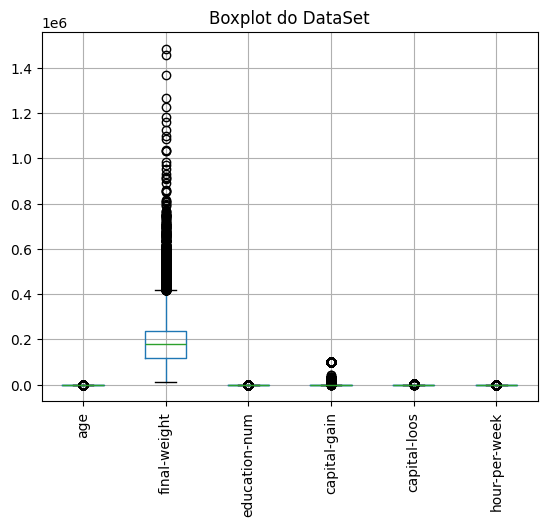

In [ ]:
#@title
#gráfico boxplot usando o método do pandas
# insira o código aqui
import matplotlib.pyplot as plt
plt.title('Boxplot do DataSet')
dataset.boxplot(figsize=(14, 6))
plt.xticks(rotation=90)
plt.show()